# 'geopandas'

Geopandas is a Python library that exstends 'pandas' by adding support for geospatial data

## Reproducible file paths

In [30]:
import os 
import geopandas as gpd
import matplotlib.pyplot as plt

To import the data we first use 'os' package to create a reproducible file path:

In [31]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp') 

fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [32]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [33]:
fp = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary
                  

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## 'GeoSeries' and 'GeoDataFrame' 

'geopandas.GeoDataFrame'  = core structure in geopandas = 'pandas.DataFrame' plus a dedicated geometry column that can perform spatial operations

**Geometry columns** holds the geometry(points,lines,polygons) of each observation

In [34]:
# Check data type of the pigs dataframe
print(type(pigs))

# Check data type of the geometry column
print(type(pigs.geometry))

# Check data type of gbifID column
print(type(pigs['gbifID']))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [35]:
# check 


In [36]:
# Check type of each element in geometry column 
pigs.geom_type


0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

What is the geometry type of a single feature in the CA state boundary?

In [37]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

# CRS
Two other important attributes of a geopandas.GeoDataFrame are its coordinate reference system (CRS) and its extent.

We can think of the **coordinate reference system (CRS)** as the instructions to locate each spatial feature of our data frame on the surface of the Earth. We access the CRS of a `geopandas.GeoDataFrame` using the crs attribute:

In [38]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
# Examine CRS details
print('Ellipsoid:', pigs.crs.ellipsoid)
print('Datum:', pigs.crs.datum)
print('Is geographic?', pigs.crs.is_geographic) # geographic or projected? aka 3D (geo) or 2D (proj)
print('Is projected?', pigs.crs.is_projected)

Ellipsoid: WGS 84
Datum: World Geodetic System 1984 ensemble
Is geographic? True
Is projected? False


In [40]:
# Obtain geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [41]:
# Examine CRS and extent of CA boundary
print('CRS: ', ca_boundary.crs, '\n') # the '\n' adds a blank line after the CRS output
print(ca_boundary.total_bounds)

CRS:  EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [42]:
pigs.crs == ca_boundary.crs


True

You can use all your `pandas` data wrangling 

In [43]:
# Examine pig observations by year`
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [44]:
# Select data from 2020 onqwards
pigs_recent = pigs[pigs['year'] >= 2020]

# Check length of original dataframe 
print('Total number of pig observations:', len(pigs))

# Check length of new dataframe 
print('Number of pig observations from 2020 onwards:', len(pigs_recent))


Total number of pig observations: 1046
Number of pig observations from 2020 onwards: 606


# Create a map (prelimnary)
Similarly to a `pandas.DataFrame`, a `geopandas.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the `geopandas.GeoDataFrame` will be used to create the axes of the plot.

<Axes: >

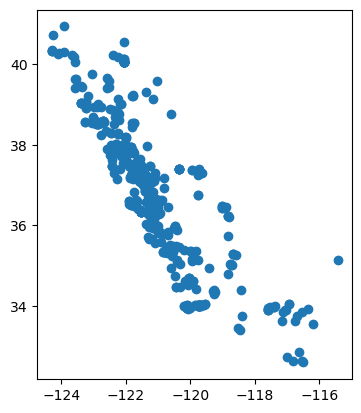

In [48]:
pigs.plot()